# NY Taxi Rides Analytics

## First part analysis is based on nyc_data.csv

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Data path
data_filename = r"C:\Users\sheng\OneDrive\Desktop\nyc_data.csv"

In [3]:
# Read dataset
data = pd.read_csv(data_filename, parse_dates=['pickup_datetime', 'dropoff_datetime'] )

In [4]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:00,2013-01-01 00:12:00,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


## Data type, name and frequencies

In [5]:
# Display column names
list(data.columns.values)

['medallion',
 'hack_license',
 'vendor_id',
 'rate_code',
 'store_and_fwd_flag',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_time_in_secs',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

In [9]:
# Display number of rows
count_row = data.shape[0] 
count_row

846945

In [10]:
# Display data type for each variable
print(data.dtypes)

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
dtype: object


In [11]:
# Display object variable frequencies for variable 'medallion'
data['medallion'].value_counts()

E8260A241D62ECC156ECB8AD607E1E6B    125
20BA941F62CC07F1FA3EF3E122B1E9B2    125
22D1934CF861B8BE43F10FBAD93FEF69    121
D30BED60331C79E3F7ACD05B325ED42F    118
A0DEAEC3D5592AE94B876356F12F8158    118
                                   ... 
937A41116FCDEBA535FC3FA0B2965043      1
3B560B5B338526D38E1EB0B2E0027463      1
476657049B62401D5EB59CEF8C6F2FC1      1
1F5D2DEFB597C51BC202FD77ED94902B      1
C307D72945A061AF8E32B1BB708F446B      1
Name: medallion, Length: 13446, dtype: int64

In [12]:
# Display object variable frequencies for variable 'hack_license'
data['hack_license'].value_counts()

03173DD93C1171DA1788E6E7D733C5A9    97
23DF80C977D15141F11DD713C523C311    88
51C1BE97280A80EBFA8DAD34E1956CF6    78
3D757E111C78F5CAC83D44A92885D490    78
19B3F3F825E4C1DE13B9D5C0628F5001    77
                                    ..
236BB4C8D951D35BA041D86774AC1BD1     1
C01D892AAFF7642EC4AD094D18AF8805     1
5559ACA39EB3C37E449731790E37AED7     1
9D3EF01E386FA4FBC332F1AE803FDE07     1
20DE61E8208E5C7BDC13F4C79D2A4434     1
Name: hack_license, Length: 38391, dtype: int64

In [13]:
# Display object variable frequencies for variable 'vendor_id'
data['vendor_id'].value_counts()

CMT    424678
VTS    422267
Name: vendor_id, dtype: int64

In [14]:
# Display object variable frequencies for variable 'store_and_fwd_flag'
data['store_and_fwd_flag'].value_counts()

N    414599
Y      9978
Name: store_and_fwd_flag, dtype: int64

In [15]:
# Apply lambda function to explore numeric statistics for variable 'trip_distance'
data['trip_distance'].describe().apply(lambda x: format(x, '.2f'))

count     846945.00
mean           9.96
std         6525.20
min            0.00
25%            1.05
50%            1.80
75%            3.20
max      6005123.00
Name: trip_distance, dtype: object

In [16]:
# Apply lambda function to explore numeric statistics for variable 'passenger_count'
data['passenger_count'].describe().apply(lambda x: format(x, '.2f'))

count    846945.00
mean          1.71
std           1.38
min           0.00
25%           1.00
50%           1.00
75%           2.00
max           6.00
Name: passenger_count, dtype: object

In [17]:
# Apply lambda function to explore numeric statistics for variable 'trip_time_in_secs'
data['trip_time_in_secs'].describe().apply(lambda x: format(x, '.2f'))

count     846945.00
mean         812.52
std        16098.31
min          -10.00
25%          361.00
50%          600.00
75%          960.00
max      4294796.00
Name: trip_time_in_secs, dtype: object

In [18]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [19]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [20]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [21]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

## Display a scatter plot of pickup locations and updated scatter plot group by vendor_id.

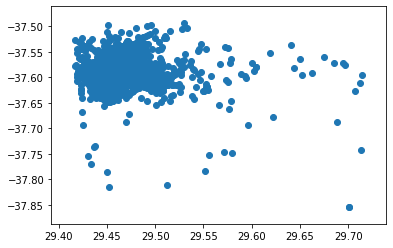

In [22]:
plt.scatter(px, py)

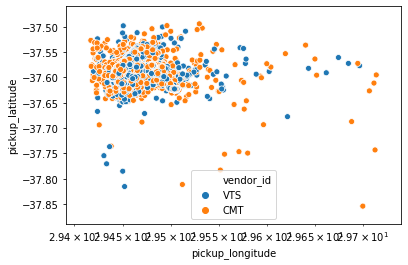

In [23]:
g =sns.scatterplot(px, py, hue="vendor_id", data=data)
g.set(xscale="log")
g

In [24]:
# By assigning different color on vendor_id, I found CMT has more intensive and wild geographic areas within NY, 
#so there is a bigger possibility to get a cab that is owned by CMT.

(29.4, 29.55, -37.63, -37.54)

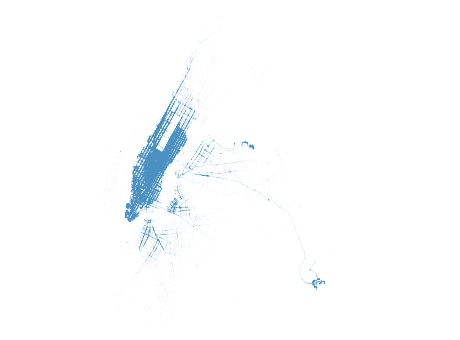

In [25]:
# Specify the figure size
plt.figure(figsize=(8, 6))
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=0.03)
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')

## Display a histogram of the trip distances.

In [26]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

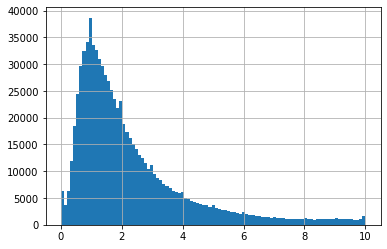

In [27]:
data.trip_distance.hist(bins=bin_array)

In [28]:
# Extract data from 0-2 to analyze main histogram mass
data2=data[['trip_distance']][(data['trip_distance']>=0)&(data['trip_distance']<2)]
len(data2)

466645

In [29]:
# Sort value freqencies to find the most common value
data2['trip_distance'].value_counts().sort_values()

0.02       92
0.01      107
0.03      130
0.04      139
0.05      140
        ...  
1.20    17823
1.10    18263
0.80    18449
0.90    18915
1.00    21815
Name: trip_distance, Length: 200, dtype: int64

In [30]:
# From sorting analysis, 1.00 is the most common trip_distance

## Second part analysis is based on nyc_fare.csv

In [31]:
# Data path.
data_filename = r"C:\Users\sheng\OneDrive\Desktop\nyc_fare.csv"

In [32]:
# Read dataset
df = pd.read_csv(data_filename, parse_dates=['pickup_datetime'] )

In [33]:
df.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:00,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


## Data type, name and frequencies

In [34]:
# Display column names
list(df.columns.values)

['medallion',
 'hack_license',
 'vendor_id',
 'pickup_datetime',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

In [35]:
# Display number of rows
count_row = df.shape[0] 
count_row

846945

In [36]:
# Display data type for each variable
print(df.dtypes)

medallion                  object
hack_license               object
vendor_id                  object
pickup_datetime    datetime64[ns]
payment_type               object
fare_amount               float64
surcharge                 float64
mta_tax                   float64
tip_amount                float64
tolls_amount              float64
total_amount              float64
dtype: object


In [37]:
# Display object variable frequencies for variable 'hack_license'
df['hack_license'].value_counts()

03173DD93C1171DA1788E6E7D733C5A9    97
23DF80C977D15141F11DD713C523C311    88
51C1BE97280A80EBFA8DAD34E1956CF6    78
3D757E111C78F5CAC83D44A92885D490    78
19B3F3F825E4C1DE13B9D5C0628F5001    77
                                    ..
236BB4C8D951D35BA041D86774AC1BD1     1
C01D892AAFF7642EC4AD094D18AF8805     1
5559ACA39EB3C37E449731790E37AED7     1
9D3EF01E386FA4FBC332F1AE803FDE07     1
20DE61E8208E5C7BDC13F4C79D2A4434     1
Name: hack_license, Length: 38391, dtype: int64

In [38]:
# Display object variable frequencies for variable 'payment_type'
df['payment_type'].value_counts()

CRD    456019
CSH    387455
NOC      1921
UNK       984
DIS       566
Name: payment_type, dtype: int64

In [39]:
# Apply lambda function to explore numeric statistics for variable 'fare_amount'
df['fare_amount'].describe().apply(lambda x: format(x, '.2f'))

count    846945.00
mean         12.19
std           9.51
min        -648.42
25%           6.50
50%           9.50
75%          14.00
max         620.01
Name: fare_amount, dtype: object

In [40]:
# Apply lambda function to explore numeric statistics for variable 'surcharge'
df['surcharge'].describe().apply(lambda x: format(x, '.2f'))

count    846945.00
mean          0.32
std           0.77
min          -1.00
25%           0.00
50%           0.00
75%           0.50
max         628.84
Name: surcharge, dtype: object

In [41]:
# Apply lambda function to explore numeric statistics for variable 'mta_tax'
df['mta_tax'].describe().apply(lambda x: format(x, '.2f'))

count    846945.00
mean          0.50
std           0.06
min          -0.50
25%           0.50
50%           0.50
75%           0.50
max          41.49
Name: mta_tax, dtype: object

In [42]:
# Apply lambda function to explore numeric statistics for variable 'tip_amount '
df['tip_amount'].describe().apply(lambda x: format(x, '.2f'))

count    846945.00
mean          1.34
std           2.09
min           0.00
25%           0.00
50%           1.00
75%           2.00
max         200.00
Name: tip_amount, dtype: object

In [43]:
# Apply lambda function to explore numeric statistics for variable 'total_amount'
df['total_amount'].describe().apply(lambda x: format(x, '.2f'))

count    846945.00
mean         14.59
std          11.38
min         -52.50
25%           8.00
50%          11.00
75%          16.50
max         620.01
Name: total_amount, dtype: object

## Display a histogram of the fare total amounts.

In [44]:
# From lambda analysis, the majority amount of total fare is under 80, so bin_array set from 0-80, though there is some 
# negative amount, but from common sense, the fare amount should be positive in major conditions.
bin_array1 = np.linspace(start=0., stop=80., num=100)
bin_array1

array([ 0.        ,  0.80808081,  1.61616162,  2.42424242,  3.23232323,
        4.04040404,  4.84848485,  5.65656566,  6.46464646,  7.27272727,
        8.08080808,  8.88888889,  9.6969697 , 10.50505051, 11.31313131,
       12.12121212, 12.92929293, 13.73737374, 14.54545455, 15.35353535,
       16.16161616, 16.96969697, 17.77777778, 18.58585859, 19.39393939,
       20.2020202 , 21.01010101, 21.81818182, 22.62626263, 23.43434343,
       24.24242424, 25.05050505, 25.85858586, 26.66666667, 27.47474747,
       28.28282828, 29.09090909, 29.8989899 , 30.70707071, 31.51515152,
       32.32323232, 33.13131313, 33.93939394, 34.74747475, 35.55555556,
       36.36363636, 37.17171717, 37.97979798, 38.78787879, 39.5959596 ,
       40.4040404 , 41.21212121, 42.02020202, 42.82828283, 43.63636364,
       44.44444444, 45.25252525, 46.06060606, 46.86868687, 47.67676768,
       48.48484848, 49.29292929, 50.1010101 , 50.90909091, 51.71717172,
       52.52525253, 53.33333333, 54.14141414, 54.94949495, 55.75

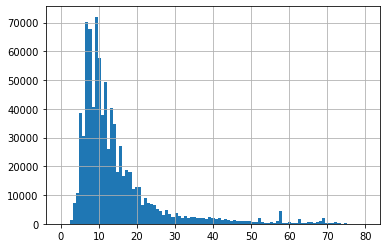

In [45]:
df.total_amount.hist(bins=bin_array1)

In [46]:
# Extract data from 5-10 to analyze main histogram mass
bin_array2 = np.linspace(start=4., stop=16., num=100)
df2=df[['total_amount']][(df['total_amount']>=5)&(df['total_amount']<=15)]
len(df2)

582415

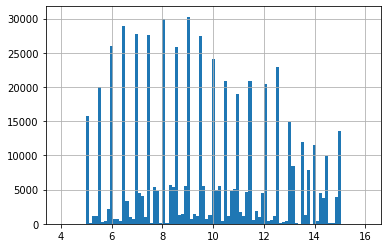

In [47]:
df2.total_amount.hist(bins=bin_array2)

In [48]:
# Sort value freqencies to find the most common value
df['total_amount'].value_counts().sort_values()

36.23         1
40.01         1
10.06         1
125.62        1
35.13         1
          ...  
7.50      27494
7.00      27764
8.00      28752
6.50      28883
9.00      30209
Name: total_amount, Length: 3859, dtype: int64

In [49]:
# The max value of fare amount is 620.01, but mean value is 14.59. From freqency chart, 6-10 is the range that most
# fare amount locate in, and from sorting result, we can derive same conclusion, 9.00, 6.50, 8.00, 7.50 and 7.00
# have higher frequency, and those amount all from range 6-10. The reason why mean value is 14.59, which is bigger
# than major range is because the distribution of total amount histogram obey Positive Skew, which is a statistical
# term. That is to say, the total amount of frequency of (fare value > 10) is bigger than that of (fare value < 5).

## Filtering with boolean indexing
### Select long rides

In [50]:
# Extract data >100 
unusual=data[['trip_distance']][(data['trip_distance']>100)]
len(unusual)

4

In [51]:
print(unusual)

        trip_distance
504497      6005123.0
507107          181.8
548988          442.0
558665          164.4


In [52]:
# By filtering trip_distance>100, there are 4 trips.

In [53]:
#End